<a href="https://colab.research.google.com/github/DavyL0/credit-analyse/blob/main/Profissao_Cientista_de_Dados_M11_assignment01_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Árvores de regressão - exercícios 01

*Atenção! Devido descontinuação da base de imóveis boston os alunos devem utilizar a base de dados que se encontra em anexo.*

A base que utilizaremos contem os dados dos imóveis da california.
Considerem como variável Target (a ser prevista) a coluna median_house_value.
O dataset é muito semelhante ao de boston, contendo localização, quartos, banheiros e outras variáveis interessantes para construção do modelo.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split



### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

In [3]:
house = pd.read_csv('housing.csv')
house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [16]:
scaler = StandardScaler()
house[['total_rooms', 'total_bedrooms']] = scaler.fit_transform(house[['total_rooms', 'total_bedrooms']])
house['median_income'] = house['median_income'].astype(int)
house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,-0.804819,-0.970325,322.0,126.0,8,452600.0,NEAR BAY
1,-122.22,37.86,21.0,2.045890,1.348276,2401.0,1138.0,8,358500.0,NEAR BAY
2,-122.24,37.85,52.0,-0.535746,-0.825561,496.0,177.0,7,352100.0,NEAR BAY
3,-122.25,37.85,52.0,-0.624215,-0.718768,558.0,219.0,5,341300.0,NEAR BAY
4,-122.25,37.85,52.0,-0.462404,-0.611974,565.0,259.0,3,342200.0,NEAR BAY


### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

<ipython-input-5-89b0841b2e54>:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 90)` for the same effect.

  ax1b = sns.pointplot(x="ocean_proximity", y="median_house_value", data=house, dodge=True, ci = 90, color = 'navy')
<ipython-input-5-89b0841b2e54>:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 90)` for the same effect.

  ax2b = sns.pointplot(x="total_bedrooms", y="total_rooms", data=house, dodge=True, ci = 90, color = 'navy')
<ipython-input-5-89b0841b2e54>:32: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 90)` for the same effect.

  ax3b = sns.pointplot(x="housing_median_age", y="median_house_value", data=house, dodge=True, ci = 90, color = 'navy')


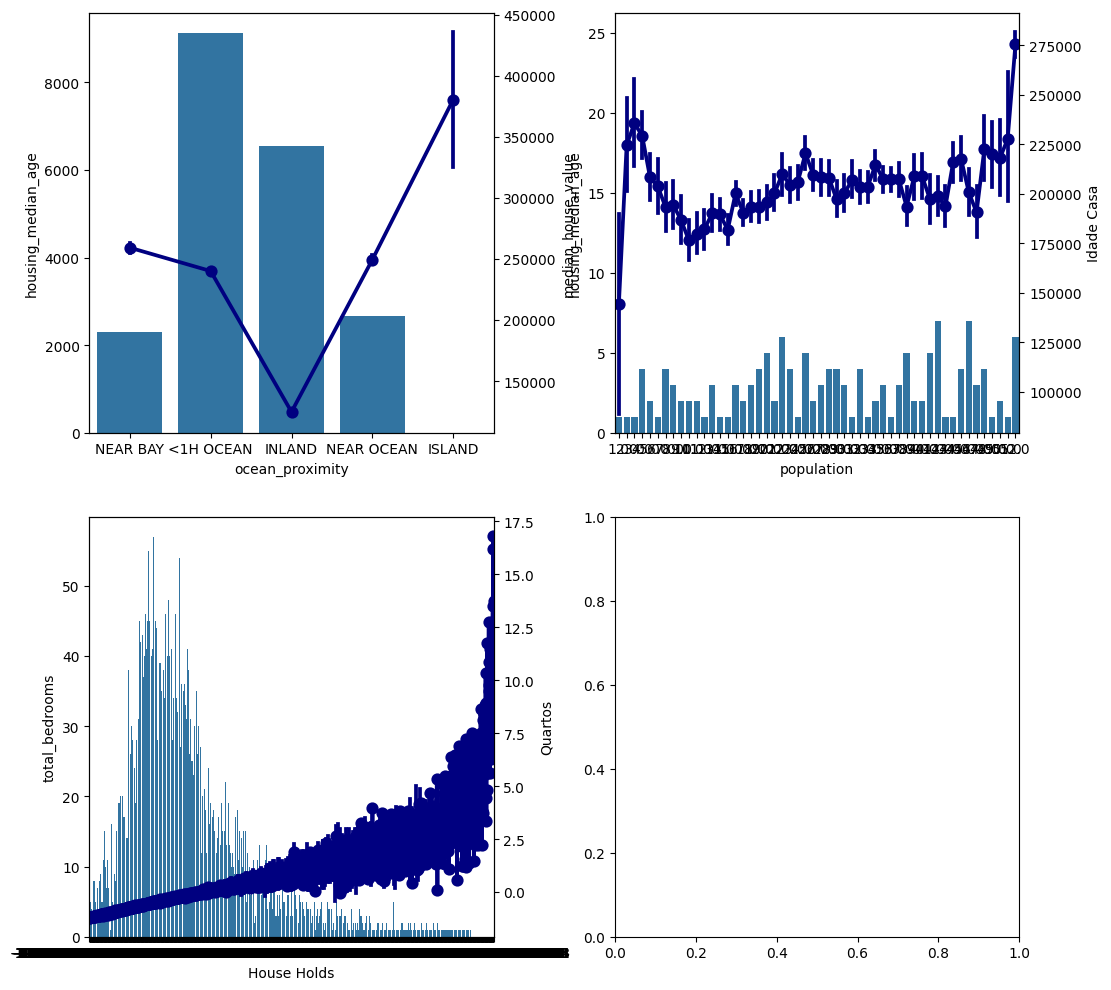

In [5]:
plt.rc('figure', figsize=(12, 12))

fig, axes = plt.subplots(2, 2)

# Gráfico 1: Proximidade do Oceano
ax1 = axes[0,0]
sns.countplot(x="ocean_proximity", data=house, dodge=True, ax = ax1)
ax1.set_ylabel("housing_median_age")
ax1.set_xlabel("ocean_proximity")

ax1b = ax1.twinx()
ax1b = sns.pointplot(x="ocean_proximity", y="median_house_value", data=house, dodge=True, ci = 90, color = 'navy')


# Gráfico 2: Total de quartos e salas
ax2 = axes[1,0]
sns.countplot(x="households", data=house, dodge=True, ax = ax2)
ax2.set_ylabel("total_bedrooms")
ax2.set_xlabel("House Holds")

ax2b = ax2.twinx()
ax2b = sns.pointplot(x="total_bedrooms", y="total_rooms", data=house, dodge=True, ci = 90, color = 'navy')
plt.ylabel("Quartos")

# Gráfico 3: Latitude
ax3 = axes[0,1]
sns.countplot(x="population", data=house, dodge=True, ax = ax3)
ax3.set_ylabel("housing_median_age")
ax3.set_xlabel("population")

ax3b = ax3.twinx()
ax3b = sns.pointplot(x="housing_median_age", y="median_house_value", data=house, dodge=True, ci = 90, color = 'navy')
plt.ylabel("Idade Casa")

plt.subplots_adjust(wspace=.3, hspace=0.2)


### 3. Separe os dados em validação e teste

<ipython-input-6-5a9aa4375f01>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 90)` for the same effect.

  ax2 = sns.pointplot(x="ocean_proximity", y="median_house_value", data=house, dodge=True, ci = 90)


Text(0, 0.5, 'Valor Medio da Casa')

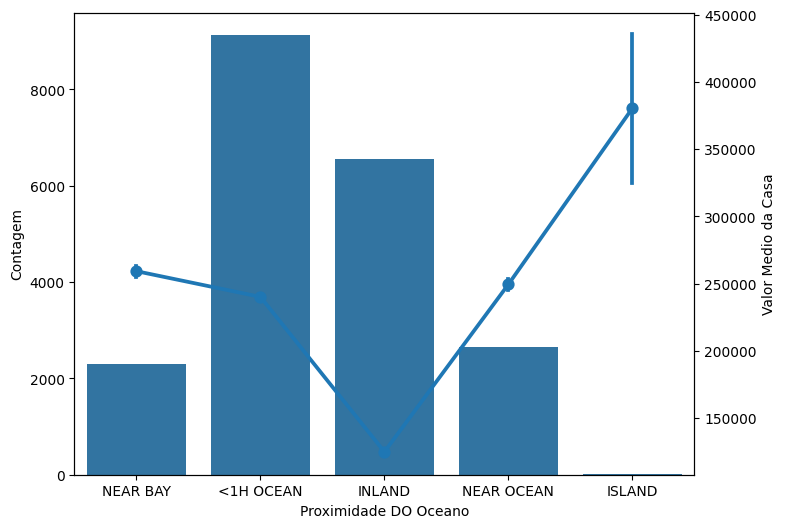

In [6]:
plt.rc('figure', figsize=(8, 6))


ax = sns.countplot(x="ocean_proximity",
                   data=house, dodge=True)
plt.ylabel("Contagem")
plt.xlabel("Proximidade DO Oceano")

ax2 = ax.twinx()
ax2 = sns.pointplot(x="ocean_proximity", y="median_house_value", data=house, dodge=True, ci = 90)
plt.ylabel("Valor Medio da Casa")


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
<ipython-input-19-edbde95d1fcc>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax2 = sns.pointplot(x="ocean_proximity", y="median_house_value", data=house, color='red', ci=None, linestyles='', markers='+')


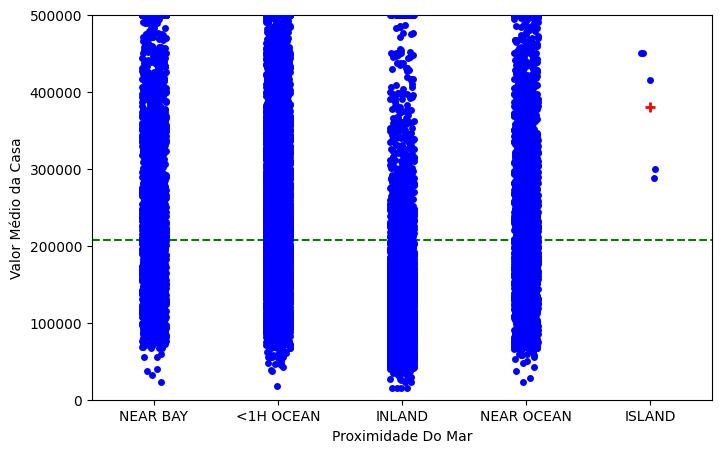

In [19]:
plt.rc('figure', figsize=(8, 5))

# Strip plot
ax1 = sns.stripplot(x="ocean_proximity", y="median_house_value", data=house, color='blue')
ax1.set(ylim=(0, house['median_house_value'].max()))  # Adjust y-axis limit based on data
ax1.axhline(house['median_house_value'].mean(), ls='--', color='green')

# Point plot
ax2 = sns.pointplot(x="ocean_proximity", y="median_house_value", data=house, color='red', ci=None, linestyles='', markers='+')

# Labels
ax1.set_ylabel("Valor Médio da Casa")
ax1.set_xlabel("Proximidade Do Mar")

plt.show()


### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [17]:
X = house.drop(columns = ['longitude', 'median_house_value', 'latitude','population','households']).copy()

X = pd.get_dummies(X, drop_first = True)
print(X.info())
X.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   housing_median_age          20640 non-null  float64
 1   total_rooms                 20640 non-null  float64
 2   total_bedrooms              20433 non-null  float64
 3   median_income               20640 non-null  int64  
 4   ocean_proximity_INLAND      20640 non-null  bool   
 5   ocean_proximity_ISLAND      20640 non-null  bool   
 6   ocean_proximity_NEAR BAY    20640 non-null  bool   
 7   ocean_proximity_NEAR OCEAN  20640 non-null  bool   
dtypes: bool(4), float64(3), int64(1)
memory usage: 725.8 KB
None


,housing_median_age,total_rooms,total_bedrooms,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,41.0,-0.804819,-0.970325,8,False,False,True,False
1,21.0,2.045890,1.348276,8,False,False,True,False
2,52.0,-0.535746,-0.825561,7,False,False,True,False
3,52.0,-0.624215,-0.718768,5,False,False,True,False
4,52.0,-0.462404,-0.611974,3,False,False,True,False


In [20]:
y =  house.loc[:,'median_house_value']

y.head()

,median_house_value
0,452600.0
1,358500.0
2,352100.0
3,341300.0
4,342200.0


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2360873)

In [22]:
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=8)

regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8)

In [25]:
representacao_textual = tree.export_text(regr_1)
print(representacao_textual)

|--- feature_3 <= 4.50
|   |--- feature_4 <= 0.50
|   |   |--- value: [207547.50]
|   |--- feature_4 >  0.50
|   |   |--- value: [112101.29]
|--- feature_3 >  4.50
|   |--- feature_3 <= 6.50
|   |   |--- value: [292459.32]
|   |--- feature_3 >  6.50
|   |   |--- value: [428306.99]



### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [23]:
# mse1 = mean_squared_error(y_test, regr_1.predict(X_test))
mse1 = regr_1.score(X_train, y_train)
mse2 = regr_2.score(X_train, y_train)

template = "O MSE da árvore com profundidade={0} é: {1:.2f}"

print(template.format(regr_1.get_depth(),mse1).replace(".",","))
print(template.format(regr_2.get_depth(),mse2).replace(".",","))

O MSE da árvore com profundidade=2 é: 0,49
O MSE da árvore com profundidade=8 é: 0,68


### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

A arvore de profundidade 2 é mais adequada.

### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

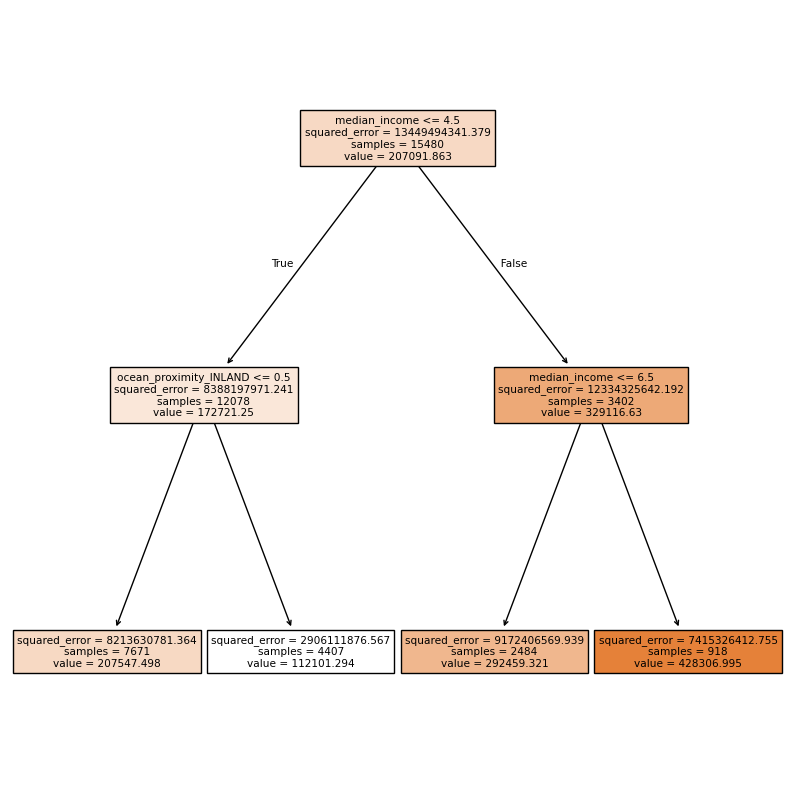

In [24]:
plt.rc('figure', figsize=(10, 10))
tp = tree.plot_tree(regr_1,
                    feature_names=X.columns,
                    filled=True)